<a href="https://www.kaggle.com/code/dasaris/regression-diamond-price-prediction?scriptVersionId=99139416" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# EDA + Prediction of Diamond Prices 💎💵 

![diamond](https://dictionary.cambridge.org/de/images/thumb/diamon_noun_002_10599.jpg?version=5.0.244)

## About the Dataset

**Context**

This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

**Content**

* price price in US dollars (\$326--\$18,823)

* carat weight of the diamond (0.2--5.01)

* cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

* color diamond colour, from J (worst) to D (best)

* clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

* x length in mm (0--10.74)

* y width in mm (0--58.9)

* z depth in mm (0--31.8)

* depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

* table width of top of diamond relative to widest point (43--95)

## The Mission

In this notebook we want to explore the diamonds dataset and predict diamond prices using multiple regression models


### Let's get started

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#importing the data
diamonds = pd.read_csv('../input/diamonds/diamonds.csv', index_col = 0)

In [3]:
#looking at the data
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [5]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### X, Y, Z
What we can see is, that we have 0 values in the columns x, y and z. This would mean that there are diamonds which have no dimensions. It's a sign of faulty data which is why I am going to eliminate those values.

In [6]:
#Dropping dimensionless features

diamonds = diamonds.drop(diamonds[diamonds['x'] == 0].index)
diamonds = diamonds.drop(diamonds[diamonds['y'] == 0].index)
diamonds = diamonds.drop(diamonds[diamonds['z'] == 0].index)

In [7]:
diamonds[['x','y','z']].describe()

,x,y,z
count,53920.000000,53920.000000,53920.000000
mean,5.731627,5.734887,3.540046
std,1.119423,1.140126,0.702530
min,3.730000,3.680000,1.070000
25%,4.710000,4.720000,2.910000
50%,5.700000,5.710000,3.530000
75%,6.540000,6.540000,4.040000
max,10.740000,58.900000,31.800000


In [8]:
#checking for null values 
diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

### Let's have a closer look at the data

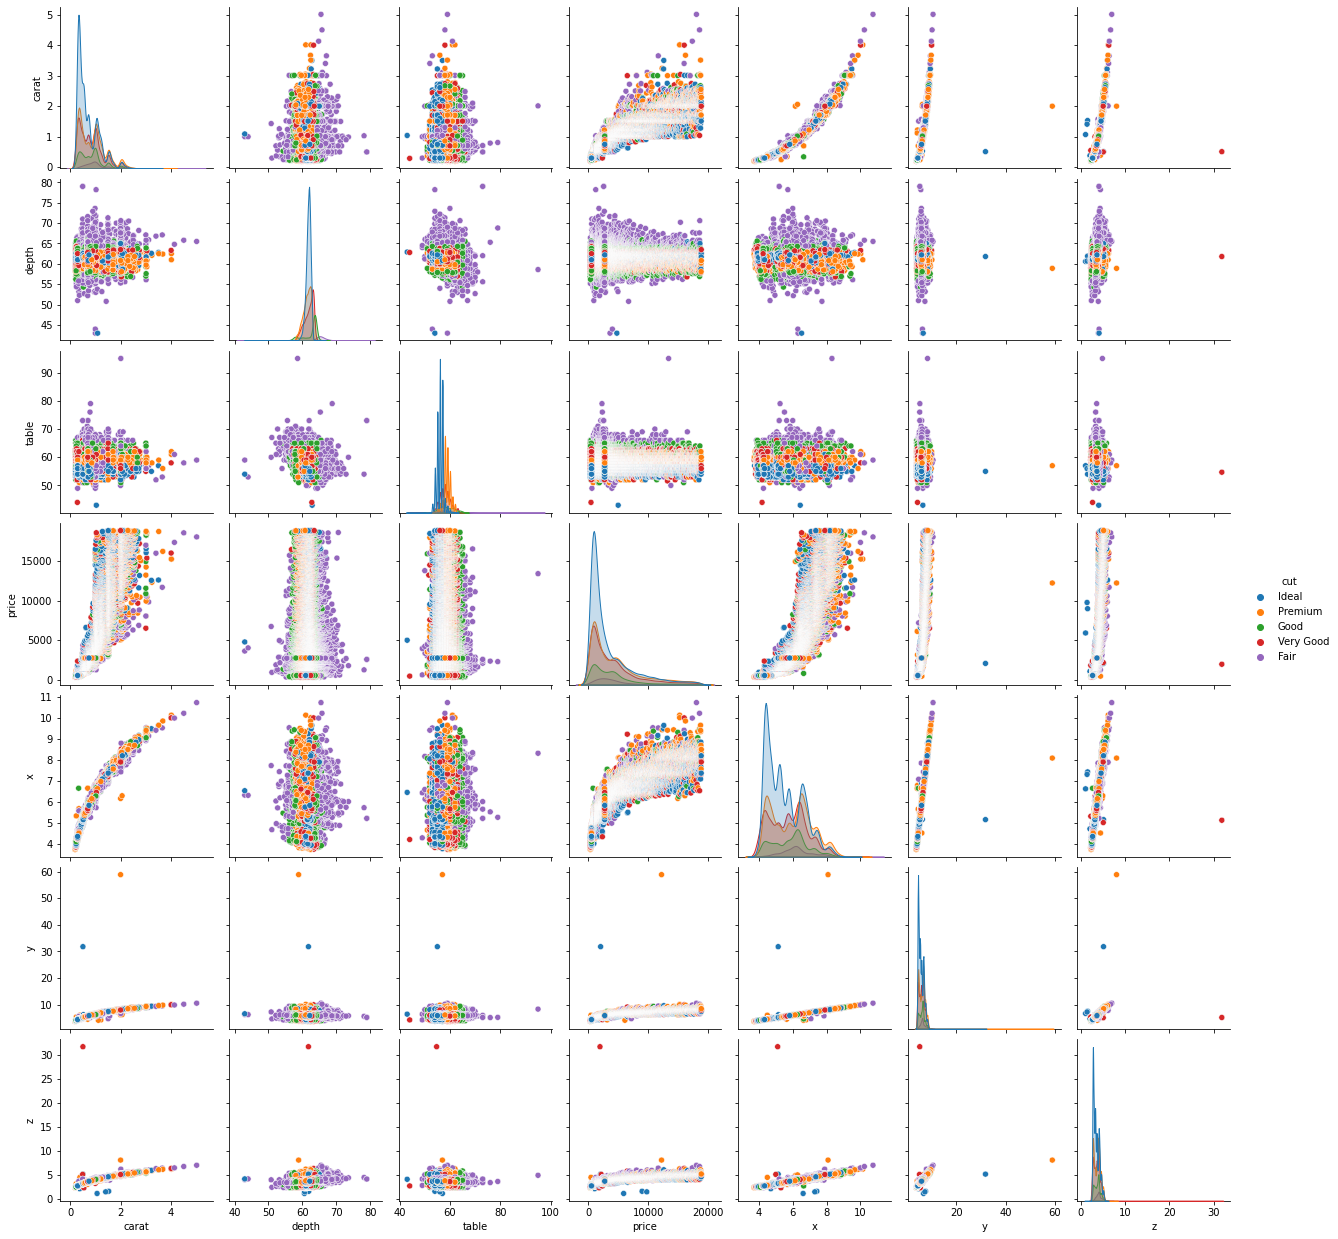

In [9]:
sns.pairplot(diamonds, hue = 'cut')

### Eliminating Outliers
Looking at the pairplot, we can see that there are outliers for x, y, z, table and depth. Let's have a closer look at them:

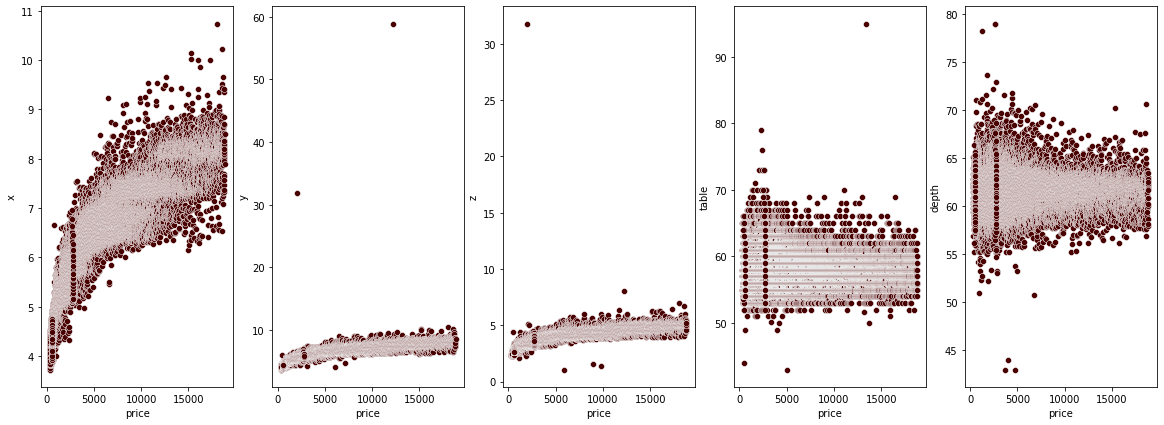

In [10]:
sns.set_palette("afmhot")
cols = ['x','y', 'z', 'table', 'depth']
c = 0

fig, axs = plt.subplots(ncols = len(cols), figsize=(20,7))

for i in cols:
    sns.scatterplot(data = diamonds, x = diamonds['price'], y = diamonds[i], ax = axs[c])
    c+=1

#### Capping the columns:
* **x** only values that are < 30
* **y** only values that are < 30
* **z** only values that are < 30 and > 2.5
* **table** only values that are < 80 and > 45
* **depth** only values that are < 75 and > 45

In [11]:
diamonds.shape

(53920, 10)

In [12]:
diamonds = diamonds[(diamonds['x'] < 30)]
diamonds = diamonds[(diamonds['y'] < 30)]
diamonds = diamonds[(diamonds['z'] < 30) & (diamonds['z'] > 2)]
diamonds = diamonds[(diamonds['table'] < 80) & (diamonds['table'] > 40)]
diamonds = diamonds[(diamonds['depth'] < 75) & (diamonds['depth'] > 45)]

diamonds.shape

(53907, 10)

We removed 13 values (rows) from the dataset. Now let's have a look again at the cleaned columns:

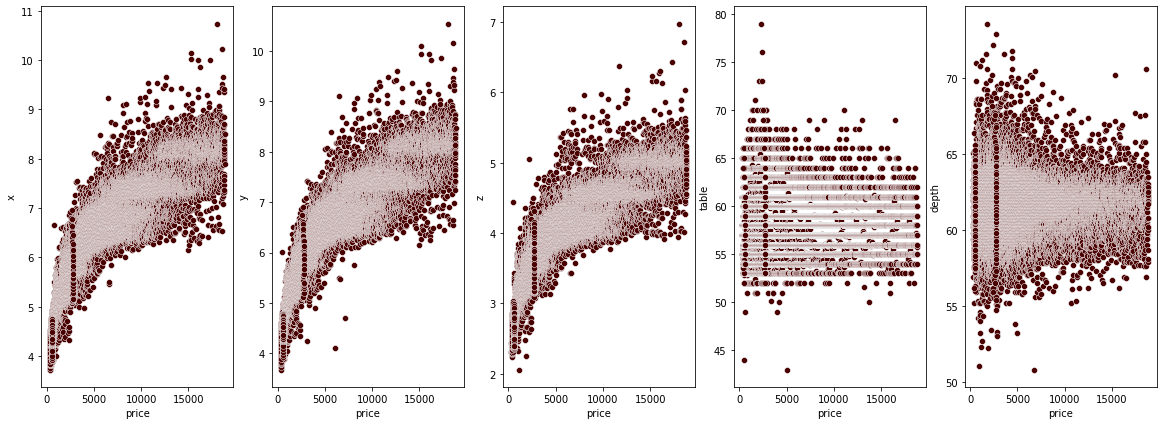

In [13]:
cols = ['x','y', 'z', 'table', 'depth']
c = 0

fig, axs = plt.subplots(ncols = len(cols), figsize=(20,7))

for i in cols:
    sns.scatterplot(data = diamonds, x = diamonds['price'], y = diamonds[i], ax = axs[c])
    c+=1

This looks much cleaner and will give us better results

#### Let's also have a look at the categorial features:

In [14]:
print(diamonds.color.unique())
print(diamonds.cut.unique())
print(diamonds.clarity.unique())

['E' 'I' 'J' 'H' 'F' 'G' 'D']
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


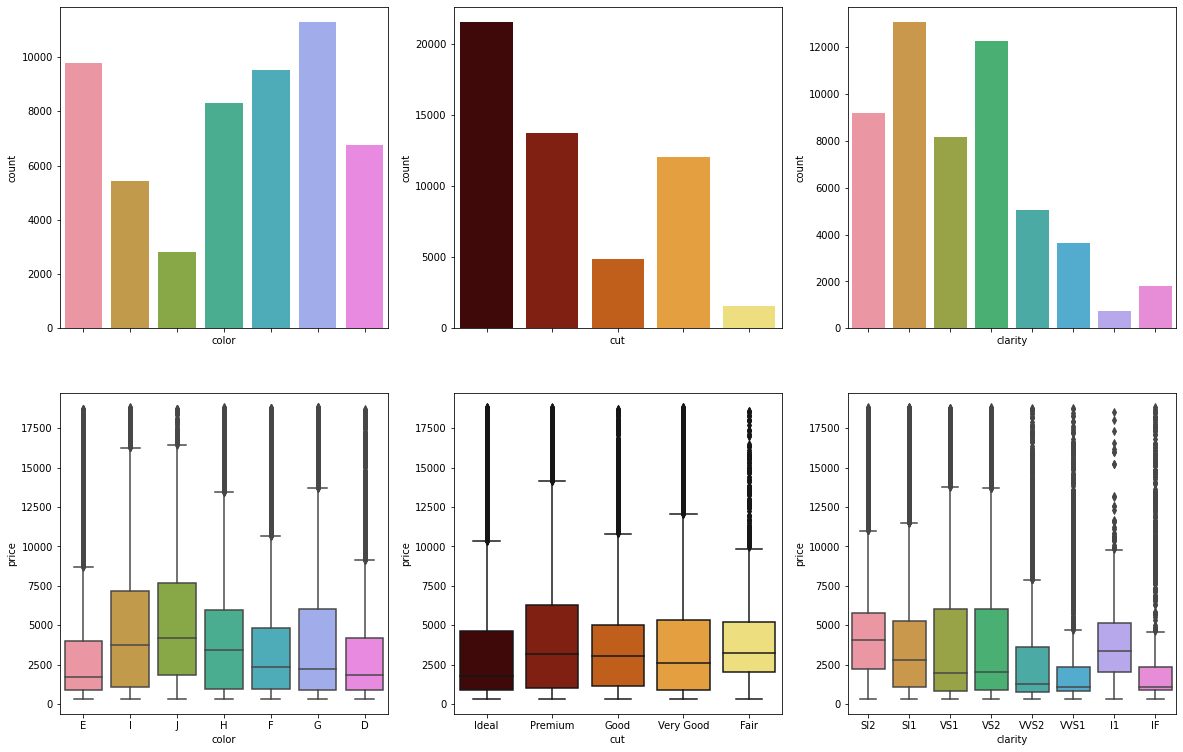

In [15]:
cats = ['color', 'cut', 'clarity']
c = 0

fig, axs = plt.subplots(ncols = len(cats), nrows = 2, sharex='col', figsize=(20,13))

for i in cats:
    sns.countplot(data = diamonds, x = diamonds[i], ax = axs[0,c])
    sns.boxplot(data = diamonds, x = diamonds[i], y = diamonds['price'], ax = axs[1,c])
    c+=1



### Converting Categorial values

In [16]:
diamonds_num = diamonds.copy()

In [17]:
#Converting Categorial to numeric values

cats = ['color', 'cut', 'clarity']

for i in cats:
    diamonds_num[i+'_numeric'] = pd.factorize(diamonds_num[i])[0]
    diamonds_num.drop(i, axis = 1, inplace = True)


**Colors:**

E = 0, I = 1, J = 2, H = 3, F = 4, G = 5, D = 6


**Cuts:**

Ideal = 0, Premium = 1, Good = 2, Very Good = 3, Fair = 4

**Clarity:**

SI2= 0, SI1 = 1, VS1 = 2, VS2 = 3, VVS2 = 4, VVS1 = 5, I1 = 6, IF = 7


So, now we have a dataframe with only numeric values:

In [18]:
diamonds_num = diamonds_num.rename(columns = {'color_numeric': 'color', 'cut_numeric': 'cut', 'clarity_numeric': 'clarity'})
diamonds_num.head()

,carat,depth,table,price,x,y,z,color,cut,clarity
1,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,0
2,0.21,59.8,61.0,326,3.89,3.84,2.31,0,1,1
3,0.23,56.9,65.0,327,4.05,4.07,2.31,0,2,2
4,0.29,62.4,58.0,334,4.20,4.23,2.63,1,1,3
5,0.31,63.3,58.0,335,4.34,4.35,2.75,2,2,0


#### Are there correlations between the features? 

In [19]:
diamonds_num.corr()

,carat,depth,table,price,x,y,z,color,cut,clarity
carat,1.000000,0.029267,0.181797,0.921590,0.977777,0.976860,0.977037,-0.065627,0.114561,-0.281252
depth,0.029267,1.000000,-0.302218,-0.010287,-0.024401,-0.027543,0.097525,-0.000314,0.170914,-0.026757
table,0.181797,-0.302218,1.000000,0.127108,0.196327,0.190153,0.155670,-0.034132,0.382303,-0.134037
price,0.921590,-0.010287,0.127108,1.000000,0.887212,0.888807,0.882634,-0.016733,0.049563,-0.140147
x,0.977777,-0.024401,0.196327,0.887212,1.000000,0.998657,0.991665,-0.055139,0.105911,-0.306834
y,0.976860,-0.027543,0.190153,0.888807,0.998657,1.000000,0.991327,-0.055317,0.109280,-0.304261
z,0.977037,0.097525,0.155670,0.882634,0.991665,0.991327,1.000000,-0.054786,0.128134,-0.306563
color,-0.065627,-0.000314,-0.034132,-0.016733,-0.055139,-0.055317,-0.054786,1.000000,-0.029074,0.032655
cut,0.114561,0.170914,0.382303,0.049563,0.105911,0.109280,0.128134,-0.029074,1.000000,-0.118869
clarity,-0.281252,-0.026757,-0.134037,-0.140147,-0.306834,-0.304261,-0.306563,0.032655,-0.118869,1.000000


<AxesSubplot:>

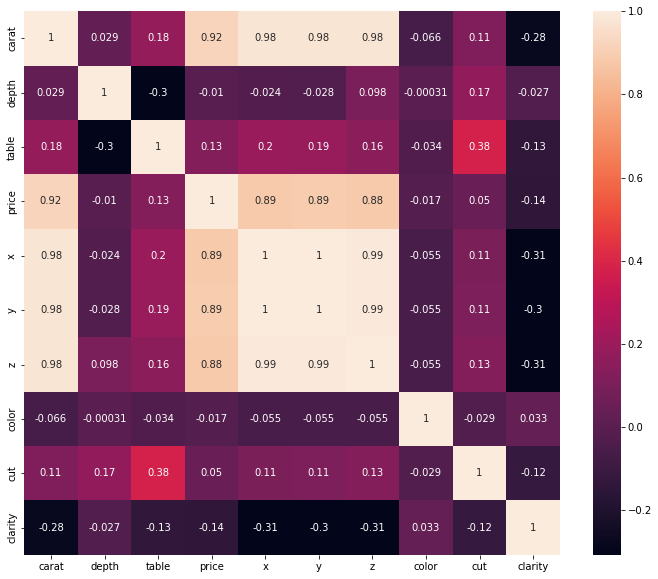

In [20]:
figure, ax = plt.subplots(figsize=(12,10))

sns.heatmap(diamonds_num.corr(), annot = True)

##### We can observe high correlations from x,y,z and carat to the price. The other features show low correlation to the price.

### Building Pipelines for standardization of the data and model-building for multiple regressors

* Pipelines function by allowing a linear series of data transforms to be linked together, resulting in a measurable modeling process.
* Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1.

In [21]:
#importing all the packages

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [22]:
#splitting the dataset in test and train data. The Price will be the Target and the other columns the features:

X = diamonds_num.drop('price', axis = 1)
y = diamonds_num['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [23]:
#Building the Pipelines

#Linear Regression
lr_pipeline = Pipeline([
    ('scaler_1', StandardScaler()),
    ('lr_classifier', LinearRegression())
])

#KNN
knn_pipeline = Pipeline([
    ('scaler_2', StandardScaler()),
    ('knn_classifier', KNeighborsRegressor())
])

#XGB
xgb_pipeline = Pipeline([
    ('scaler_3', StandardScaler()),
    ('xgb_classifier', XGBRegressor())
])

#Decision Tree
dt_pipeline = Pipeline([
    ('scaler_4', StandardScaler()),
    ('dt_classifier', DecisionTreeRegressor())
])

#Random Forest
rf_pipeline = Pipeline([
    ('scaler_5', StandardScaler()),
    ('rf_classifier', RandomForestRegressor())
])

pipelines = [lr_pipeline, knn_pipeline, xgb_pipeline, dt_pipeline, rf_pipeline]
models = ['Linear Regression', 'KNN', 'XGB', 'Decision Tree', 'Random Forest']

#### Now that we have the pipelines, we can fit our models to the training data:

In [24]:
for i in pipelines:
    i.fit(X_train, y_train)

#### Cross Validation
using the negative root mean squared error: **The higher the score the better the model**

In [25]:
cv_results = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results.append(cv_score)
    print("%s: %f " % (models[i], cv_score.mean()))

Linear Regression: -1415.806522 
KNN: -868.219906 
XGB: -560.150062 
Decision Tree: -769.306984 
Random Forest: -568.272643 


#### Looks like we should use the XGB Regressor for our predictions

Let's make the predictions and then print out the metrics for measuring our model

In [26]:
pred = xgb_pipeline.predict(X_test)

#### The metrics we will use are:

* **Means Squared Error (MSE):** Average squared difference between the estimated values and the actual value
* **Root Mean Squared Error (RMSE):** The square root of the second sample moment of the differences between predicted values and observed values
* **Mean Absolute Error (MAE):**  Average of all absolute error between paired observations expressing the same phenomenon
* **R Squared (R²)** The proportion of the variation in the dependent variable (price) that is predictable from the independent variables (features)
* **Adjusted R Squared (R²)**: R² tends to optimistically estimate the fit of the linear regression. It always increases as the number of effects are included in the model. Adjusted R2 attempts to correct for this overestimation. Adjusted R2 might decrease if a specific effect does not improve the model

In [27]:
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("R²:",metrics.r2_score(y_test, pred))
print("Adjusted R²:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

MSE: 297577.4151763991
RMSE: 545.5065674915372
MAE: 280.4481227778801
R²: 0.9803833449075071
Adjusted R²: 0.9803702350912279


#### Visualizing the predictions

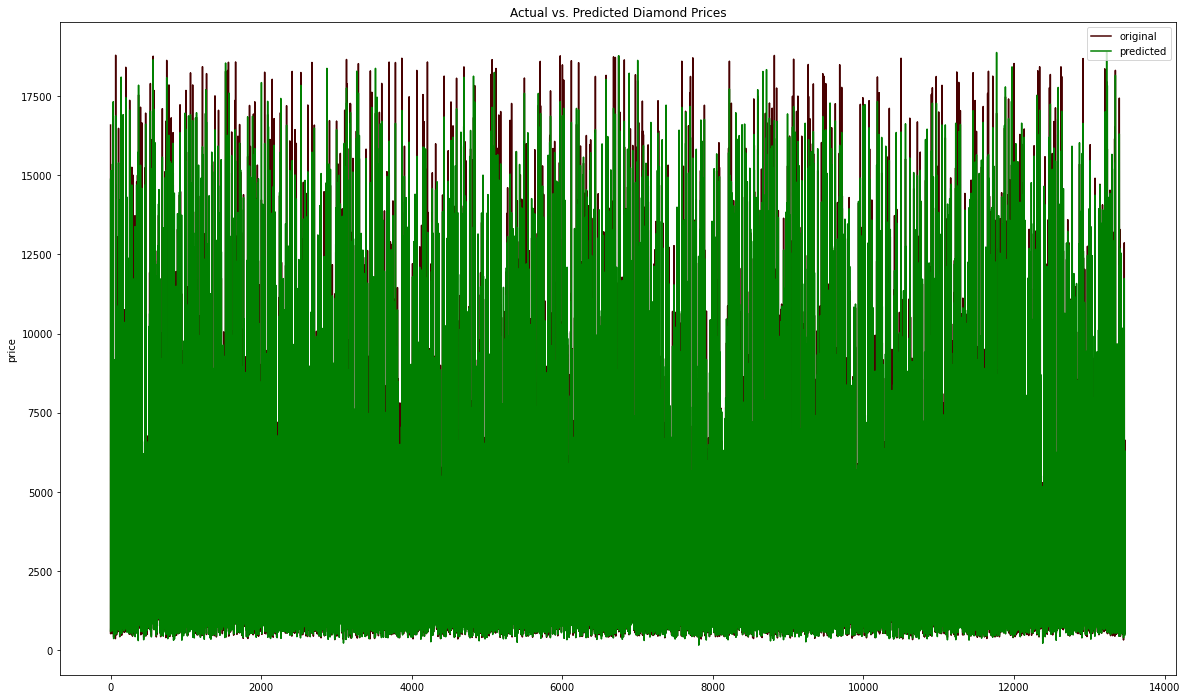

In [28]:
plt.figure(figsize = (20, 12))
x_ax = range(len(y_test))
sns.lineplot(x = x_ax, y = y_test, label="original")
sns.lineplot(x = x_ax, y = pred, label="predicted", color = 'green')
plt.title("Actual vs. Predicted Diamond Prices")
plt.legend(loc = 'upper right')
plt.show()

**Looks like we build a pretty good model!**

# The End

Thank you for taking the time to look at my notebook!

Feel free to comment anything that's on your mind. I'm looking forward to it :-) 